In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import matplotlib.pyplot as plt
import gym


from src.utils.Config import Config
from src.utils.Logging import Logger
from src.components.memory import ReplayBuffer, PrioritiesedReplayBuffer
from src.networks.models import QNetwork, NoisyQNetwork, NoisyDualingQNetwork
from src.utils.misc import train, watch

In [33]:
config = Config()

config.env = gym.make('CartPole-v1')

config.win_condition = 195.0
config.memory = PrioritiesedReplayBuffer
config.model = NoisyQNetwork
config.print_config()
config.noisy = True

logger = Logger(config)

env: 		EnvSpec(CartPole-v1)
win condition: 	195.0
state space	(4,)
action space	2
device: 	cpu
seed: 		123456789
n_episodes: 	2000
max_t: 		1000
eps_start: 	1.0
eps_end: 	0.01
eps_decay: 	0.995
eps_greedy: 	True
noisy: 		False
tau: 		0.001
gamma: 		0.99
lr: 		0.0005
memory: 	<class 'src.components.memory.PrioritiesedReplayBuffer'>
batch_size: 	64
buffer_size: 	100000
lr_annealing: 	False
learn_every: 	4
double_dqn: 	False
model: 		<class 'src.networks.models.NoisyQNetwork'>
save_loc: 	None
Logging at: logs/CartPole-v1/experiment-2020-04-19_15_31_48


In [34]:
train(config, logger)

Epi: 100	 Frame: 2103	Average Score: 21.0300	Mean: 47.0000	Duration: 0.2511	#t_s: 46.0000
Epi: 200	 Frame: 4328	Average Score: 22.2500	Mean: 74.0000	Duration: 0.6075	#t_s: 73.0000
Epi: 300	 Frame: 6350	Average Score: 20.2200	Mean: 22.0000	Duration: 0.1155	#t_s: 21.0000
Epi: 400	 Frame: 8747	Average Score: 23.9700	Mean: 18.0000	Duration: 0.0873	#t_s: 17.0000
Epi: 500	 Frame: 11362	Average Score: 26.1500	Mean: 82.0000	Duration: 0.4036	#t_s: 81.0000
Epi: 600	 Frame: 23722	Average Score: 123.6000	Mean: 191.0000	Duration: 1.2750	#t_s: 190.0000
Epi: 645	 Frame: 33073 	Average: 196.0900	Mean: 250.0000	Duration: 1.3075	#t_s: 249.0000
Environment Solved in 184.6342 seconds !


In [35]:
score_replay_buffer = logger.score
average_score_replay_buffer = logger.average_score

In [36]:
# watch(config, logger.log_file_path)

In [37]:
config = Config()

config.env = gym.make('CartPole-v1')

config.win_condition = 195.0
config.memory = ReplayBuffer
config.model = NoisyQNetwork
config.print_config()
config.noisy = True

logger = Logger(config)

env: 		EnvSpec(CartPole-v1)
win condition: 	195.0
state space	(4,)
action space	2
device: 	cpu
seed: 		123456789
n_episodes: 	2000
max_t: 		1000
eps_start: 	1.0
eps_end: 	0.01
eps_decay: 	0.995
eps_greedy: 	True
noisy: 		False
tau: 		0.001
gamma: 		0.99
lr: 		0.0005
memory: 	<class 'src.components.memory.ReplayBuffer'>
batch_size: 	64
buffer_size: 	100000
lr_annealing: 	False
learn_every: 	4
double_dqn: 	False
model: 		<class 'src.networks.models.NoisyQNetwork'>
save_loc: 	None
Logging at: logs/CartPole-v1/experiment-2020-04-19_15_34_54


In [38]:
train(config, logger)

Epi: 100	 Frame: 1302	Average Score: 13.0200	Mean: 10.0000	Duration: 0.0186	#t_s: 9.0000
Epi: 200	 Frame: 2877	Average Score: 15.7500	Mean: 10.0000	Duration: 0.0364	#t_s: 9.0000
Epi: 300	 Frame: 4390	Average Score: 15.1300	Mean: 19.0000	Duration: 0.0444	#t_s: 18.0000
Epi: 400	 Frame: 5880	Average Score: 14.9000	Mean: 10.0000	Duration: 0.0266	#t_s: 9.0000
Epi: 500	 Frame: 7243	Average Score: 13.6300	Mean: 9.0000	Duration: 0.0189	#t_s: 8.0000
Epi: 600	 Frame: 8733	Average Score: 14.9000	Mean: 9.0000	Duration: 0.0183	#t_s: 8.0000
Epi: 700	 Frame: 10414	Average Score: 16.8100	Mean: 43.0000	Duration: 0.1847	#t_s: 42.0000
Epi: 800	 Frame: 12477	Average Score: 20.6300	Mean: 18.0000	Duration: 0.0433	#t_s: 17.0000
Epi: 900	 Frame: 18347	Average Score: 58.7000	Mean: 108.0000	Duration: 0.2393	#t_s: 107.0000
Epi: 1000	 Frame: 36869	Average Score: 185.2200	Mean: 255.0000	Duration: 0.5994	#t_s: 254.0000
Epi: 1014	 Frame: 39792 	Average: 195.3200	Mean: 197.0000	Duration: 0.4793	#t_s: 196.0000
Environ

In [39]:
score_replay_per_buffer = logger.score
average_score_replay_per_buffer = logger.average_score

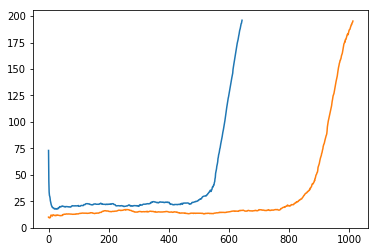

In [40]:
plt.plot(average_score_replay_buffer)
plt.plot(average_score_replay_per_buffer)
plt.show()